### Import packages

In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import os

### Define the number of practice and experiment trials and parameters

In [2]:
n_practice_rounds = 6
n_easy_trials = 40
n_medium_trials = 40
n_hard_trials = 40
n_trials = n_easy_trials + n_medium_trials + n_hard_trials
threshold_1 = 2 #In difficult rounds, dEV should be smaller than threshold_1
threshold_2 = 45 #In medium rounds, dEV should be greater than threshold_2 but greater than threshold_3
threshold_3 = 55
threshold_4 = 90 #In easy trials, dEV must be greater than this threshold_4

deadlines = [8,10,12]

### Generate all possible lotteries

In [32]:
#Function to generate all the possible lotteries
def generate_combinations():
    
    combinations = []
    
    #The first element is the value which can go from 1 to 100
    for i in range(1,101):  # First element: 1 to 99
        # The second element is the probability (in percentage) and can be anything beetween 1 and 100,
        for j in range(1,101): 
            
            #Calculate the expected value
            EV = i * (j/100)
            
            combinations.append([i,j,EV])
                
    sorted_combinations = sorted(combinations, key=lambda x: x[2])  # Sort by EV
    
    return sorted_combinations


all_combinations = generate_combinations()

### Plot expected values

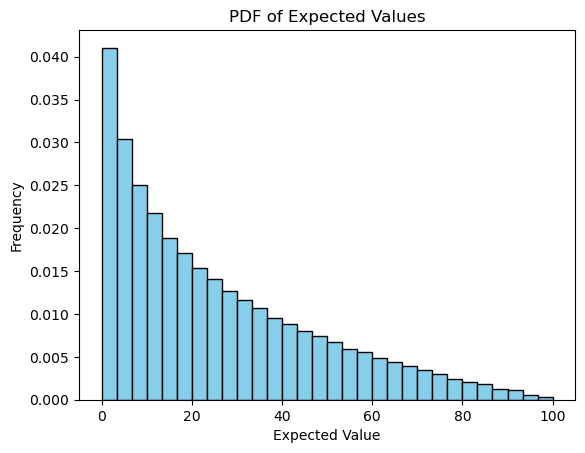

In [33]:
all_EVs = np.zeros(len(all_combinations))

for i in range(len(all_EVs)):
    all_EVs[i] = all_combinations[i][2]
    
plt.hist(all_EVs, bins=30, color='skyblue', edgecolor='black', density=True)  # density=True for normalized histogram
 
plt.xlabel('Expected Value')
plt.ylabel('Frequency')
plt.title('PDF of Expected Values')

plt.show()

### Helper functions

In [45]:
def CheckNoDoubleTrials(lot_0,lot_1,gambles_matrices,difficulty):
    """ Function to check that there are no equal trials in the experiment
    """
    
    no_double_gambles = True
    
    for i in range(len(gambles_matrices)):
        
        vector = gambles_matrices[i,1:]
        
        new_vector = np.concatenate((lot_0,lot_1,[difficulty]))
        
        if np.array_equal(vector,new_vector):
            no_double_gambles = False
            
        new_vector = np.concatenate((lot_1,lot_0,[difficulty]))
        
        if np.array_equal(vector,new_vector):
            no_double_gambles = False
        
        
    return no_double_gambles
        

In [46]:
def CheckDiffNums(lot_0,lot_1):
    """ Function to check that the 4 numbers of the two lotteries are different
    """  
    combined = lot_0 + lot_1
    
    if len(combined) == len(set(combined)):
        return True
    else:
        return False

### Generate easy trials

In [105]:
def EasyGamblesGenerator(num_gambles):
    """ Function to generate easy trials
    """
    
    difficulty = 0 #Level of difficulty = 0 (easy) 
    
    gambles_matrices = np.zeros((num_gambles,8))
    
    for i in range(num_gambles):

        gamble_valid = False
        
        while not gamble_valid:
            
            #Pick a random lottery
            lot_0 = random.choice(all_combinations)
            
            #Select all the lotteries that have dV greater than threshold 2
            desired_combinations = [vector for vector in all_combinations 
                                    if abs(lot_0[2] - vector[2]) > threshold_4]
            
            if(len(desired_combinations)>0):
                lot_1 = random.choice(desired_combinations)

                if CheckDiffNums(lot_0,lot_1):
                    if CheckNoDoubleTrials(lot_0,lot_1,gambles_matrices,difficulty):
                        gamble_valid = True
                    
        if gamble_valid:
            
            gambles_matrices[i,0] = i + 1
            
            gambles_matrices[i,1] = lot_0[0] # Value of lottery 0 
            gambles_matrices[i,2] = lot_0[1] # Probability of lottery 0
            gambles_matrices[i,3] = lot_0[2] # Expected value of lottery 0
            
            gambles_matrices[i,4] = lot_1[0] # Value of lottery 1 
            gambles_matrices[i,5] = lot_1[1] # Probability of lottery 
            gambles_matrices[i,6] = lot_1[2] # Expected value of lottery 1
            
            gambles_matrices[i,7] = difficulty
                  
    return gambles_matrices

In [106]:
easy_gambles_matrices = EasyGamblesGenerator(n_easy_trials)

### Generate hard trials

In [107]:
def HardGamblesGenerator(num_gambles):
    """Function to generate hard trials
    """
    
    difficulty = 2 #Level of difficulty = 2 (hard) 
    
    gambles_matrices = np.zeros((num_gambles,8))
    
    for i in range(num_gambles):

        gamble_valid = False
        
        while not gamble_valid:
            
            #Pick a random lottery
            lot_0 = random.choice(all_combinations)
            
            #Select all the lotteries that have dV smaller than threshold 1
            desired_combinations = [vector for vector in all_combinations 
                                    if abs(lot_0[2] - vector[2]) < threshold_1]
            
            if(len(desired_combinations)>0):
                lot_1 = random.choice(desired_combinations)

                if CheckDiffNums(lot_0,lot_1):
                    if CheckNoDoubleTrials(lot_0,lot_1,gambles_matrices,difficulty):
                        gamble_valid = True
                    
        if gamble_valid:
            
            gambles_matrices[i,0] = i + 1 + n_easy_trials + n_medium_trials
            
            gambles_matrices[i,1] = lot_0[0] # Value of lottery 0 
            gambles_matrices[i,2] = lot_0[1] # Probability of lottery 0
            gambles_matrices[i,3] = lot_0[2] # Expected value of lottery 0
            
            gambles_matrices[i,4] = lot_1[0] # Value of lottery 1 
            gambles_matrices[i,5] = lot_1[1] # Probability of lottery 
            gambles_matrices[i,6] = lot_1[2] # Expected value of lottery 1
            
            gambles_matrices[i,7] = difficulty 
                  
    return gambles_matrices

In [108]:
hard_gambles_matrices = HardGamblesGenerator(n_hard_trials)

### Generate medium trials

In [109]:
def MediumGamblesGenerator(num_gambles):
    """Function to generate medium trials
    """
    
    difficulty = 1 #Level of difficulty = 1 (medium) 
    
    gambles_matrices = np.zeros((num_gambles,8))
    
    for i in range(num_gambles):

        gamble_valid = False
        
        while not gamble_valid:
            
            #Pick a random lottery
            lot_0 = random.choice(all_combinations)
            
            #Select all the lotteries that have dV smaller than threshold 1
            desired_combinations = [vector for vector in all_combinations 
                                    if  threshold_2 < abs(lot_0[2] - vector[2]) < threshold_3]
            
            if(len(desired_combinations)>0):
                lot_1 = random.choice(desired_combinations)

                if CheckDiffNums(lot_0,lot_1):
                    if CheckNoDoubleTrials(lot_0,lot_1,gambles_matrices,difficulty):
                        gamble_valid = True
                    
        if gamble_valid:
            
            gambles_matrices[i,0] = i + 1 + n_easy_trials
            
            gambles_matrices[i,1] = lot_0[0] # Value of lottery 0 
            gambles_matrices[i,2] = lot_0[1] # Probability of lottery 0
            gambles_matrices[i,3] = lot_0[2] # Expected value of lottery 0
            
            gambles_matrices[i,4] = lot_1[0] # Value of lottery 1 
            gambles_matrices[i,5] = lot_1[1] # Probability of lottery 
            gambles_matrices[i,6] = lot_1[2] # Expected value of lottery 1
            
            gambles_matrices[i,7] = difficulty 
                  
    return gambles_matrices

In [110]:
medium_gambles_matrices = MediumGamblesGenerator(n_medium_trials)

### Set deadlines

In [111]:
# Add one more element to every gamble matrix to set deadline
zeros_column = np.zeros((easy_gambles_matrices.shape[0], 1))
easy_gambles_matrices = np.hstack((easy_gambles_matrices, zeros_column))

zeros_column = np.zeros((medium_gambles_matrices.shape[0], 1))
medium_gambles_matrices = np.hstack((medium_gambles_matrices, zeros_column))

zeros_column = np.zeros((hard_gambles_matrices.shape[0], 1))
hard_gambles_matrices = np.hstack((hard_gambles_matrices, zeros_column))

In [112]:
# Set deadlines

m = int(n_easy_trials/3)

easy_gambles_matrices[:m,-1] = np.ones(int(len(easy_gambles_matrices)/3))*deadlines[0]
easy_gambles_matrices[m:2*m,-1] = np.ones(int(len(easy_gambles_matrices)/3))*deadlines[1]
easy_gambles_matrices[2*m:3*m,-1] = np.ones(int(len(easy_gambles_matrices)/3))*deadlines[2]

m = int(n_medium_trials/3)

medium_gambles_matrices[:m,-1] = np.ones(int(len(medium_gambles_matrices)/3))*deadlines[0]
medium_gambles_matrices[m:2*m,-1] = np.ones(int(len(medium_gambles_matrices)/3))*deadlines[1]
medium_gambles_matrices[2*m:3*m,-1] = np.ones(int(len(medium_gambles_matrices)/3))*deadlines[2]

m = int(n_hard_trials/3)

hard_gambles_matrices[:m,-1] = np.ones(int(len(hard_gambles_matrices)/3))*deadlines[0]
hard_gambles_matrices[m:2*m,-1] = np.ones(int(len(hard_gambles_matrices)/3))*deadlines[1]
hard_gambles_matrices[2*m:3*m,-1] = np.ones(int(len(hard_gambles_matrices)/3))*deadlines[2]

### Save trials

In [115]:
column_names = ["GambleNumber",
                "lot_0_val",
                "lot_0_prob",
                "lot_0_ev",
                "lot_1_val",
                "lot_1_prob",
                "lot_1_ev",
                "DifficultyLevel",
                "Deadline"]

In [116]:
easy_gambles_df = pd.DataFrame(easy_gambles_matrices, columns = column_names)
medium_gambles_df = pd.DataFrame(medium_gambles_matrices, columns = column_names)
hard_gambles_df = pd.DataFrame(hard_gambles_matrices, columns = column_names)

In [117]:
gambles_df = pd.concat([easy_gambles_df, hard_gambles_df, medium_gambles_df], ignore_index=True)

In [118]:
path_to_folder = r'C:\Users\Administrator\OneDrive - UGent\Experiments\risky_dm\application\src\static\gambles'

In [119]:
gambles_file = f'{path_to_folder}/gambles.csv'
gambles_df.to_csv(gambles_file, index=False)

### Generate practice trials

In [3]:
array = np.array([[1,60,50,30,20, 8], 
                  [2,40,50,75,24,10], 
                  [3,3,6,9,2,12],
                  [4,40,80,90,10,10], 
                  [5,20,45,10,90,8], 
                  [6,80,90,20,1,12]]) 

In [4]:
column_names = ["PracticeGambleNumber",
                "lot_0_val",
                "lot_0_prob",
                "lot_1_val",
                "lot_1_prob",
                "Deadline"]

In [5]:
practice_gambles_df = pd.DataFrame(array, columns = column_names)

In [6]:
path_to_folder = r'C:\Users\Administrator\OneDrive - UGent\Experiments\risky_dm\application\src\static\gambles'

In [7]:
practice_gambles_file = f'{path_to_folder}/practice_gambles.csv'
practice_gambles_df.to_csv(practice_gambles_file, index=False)

### Analyse trials

##### Import the trials again

In [36]:
current_dir = os.getcwd()

# Path to where the csv file is relative to the current script's directory
path_to_csv = os.path.abspath(os.path.join(current_dir, 
                                           '../static/gambles'))

# Construct the full paths to the CSV files within the folder
gambles_files = f'{path_to_csv}/gambles.csv'

gambles= pd.read_csv(gambles_files)

n_rounds = len(gambles)

print(gambles.columns)

Index(['GambleNumber', 'lot_0_val', 'lot_0_prob', 'lot_0_ev', 'lot_1_val',
       'lot_1_prob', 'lot_1_ev', 'DifficultyLevel', 'Deadline'],
      dtype='object')


##### Plot distributions for easy gambles

In [55]:
easy_gambles = gambles[gambles['DifficultyLevel']==0]

diff_x_easy = easy_gambles['lot_0_val'] - easy_gambles['lot_1_val']

diff_x_easy = diff_x_easy/100

diff_p_easy = easy_gambles['lot_0_prob'] - easy_gambles['lot_1_prob']

diff_p_easy = diff_p_easy/100

diff_ev_easy = easy_gambles['lot_0_ev'] - easy_gambles['lot_1_ev']

diff_ev_easy = diff_ev_easy/100


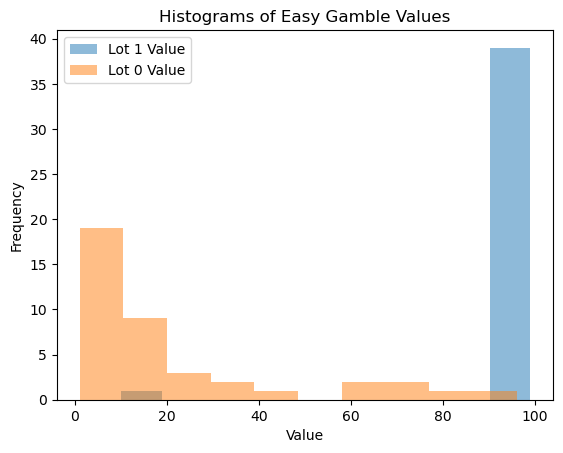

In [38]:
# Plot the histograms with translucency
plt.hist(easy_gambles['lot_1_val'], alpha=0.5, label='Lot 1 Value')
plt.hist(easy_gambles['lot_0_val'], alpha=0.5, label='Lot 0 Value')

# Add title and labels
plt.title('Histograms of Easy Gamble Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

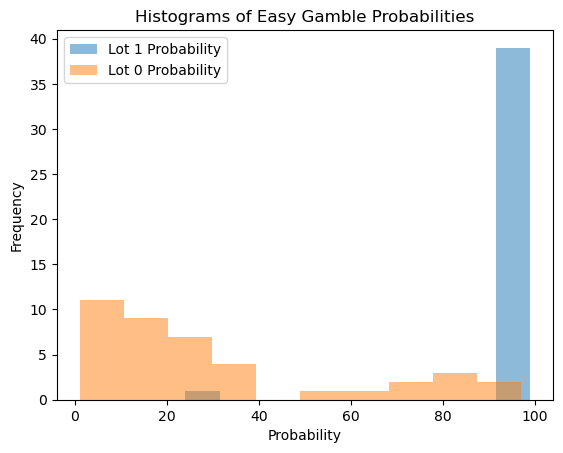

In [39]:
# Plot the histograms with translucency
plt.hist(easy_gambles['lot_1_prob'], alpha=0.5, label='Lot 1 Probability')
plt.hist(easy_gambles['lot_0_prob'], alpha=0.5, label='Lot 0 Probability')

# Add title and labels
plt.title('Histograms of Easy Gamble Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

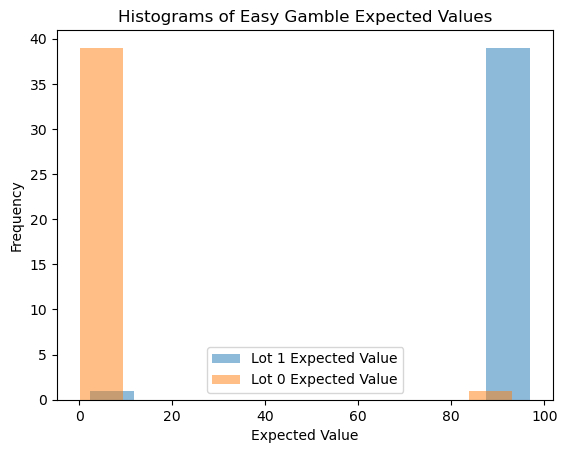

In [40]:
# Plot the histograms with translucency
plt.hist(easy_gambles['lot_1_ev'], alpha=0.5, label='Lot 1 Expected Value')
plt.hist(easy_gambles['lot_0_ev'], alpha=0.5, label='Lot 0 Expected Value')

# Add title and labels
plt.title('Histograms of Easy Gamble Expected Values')
plt.xlabel('Expected Value')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

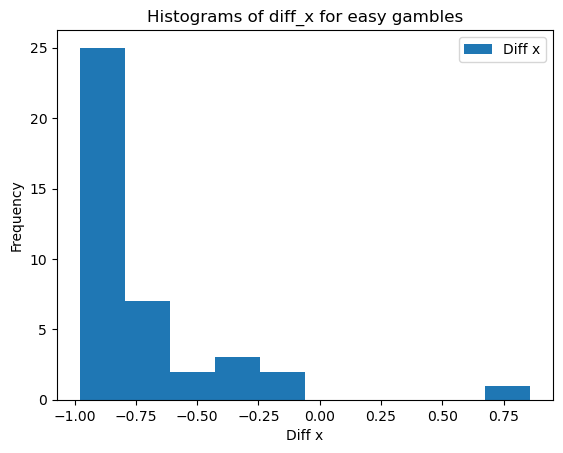

In [56]:
# Plot the histograms with translucency
plt.hist(diff_x_easy, alpha=1, label='Diff x')

# Add title and labels
plt.title('Histograms of diff_x for easy gambles')
plt.xlabel('Diff x')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

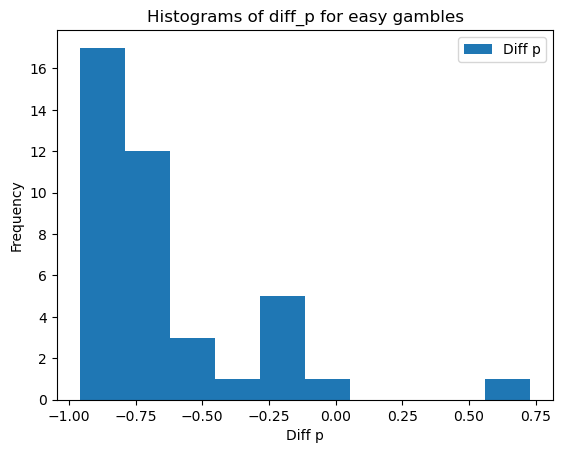

In [57]:
# Plot the histograms with translucency
plt.hist(diff_p_easy, alpha=1, label='Diff p')

# Add title and labels
plt.title('Histograms of diff_p for easy gambles')
plt.xlabel('Diff p')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

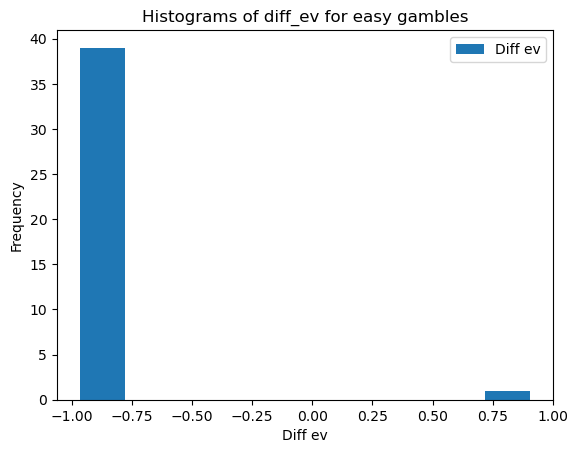

In [58]:
# Plot the histograms with translucency
plt.hist(diff_ev_easy, alpha=1, label='Diff ev')

# Add title and labels
plt.title('Histograms of diff_ev for easy gambles')
plt.xlabel('Diff ev')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

##### Plot distributions for medium gambles

In [41]:
medium_gambles = gambles[gambles['DifficultyLevel']==1]

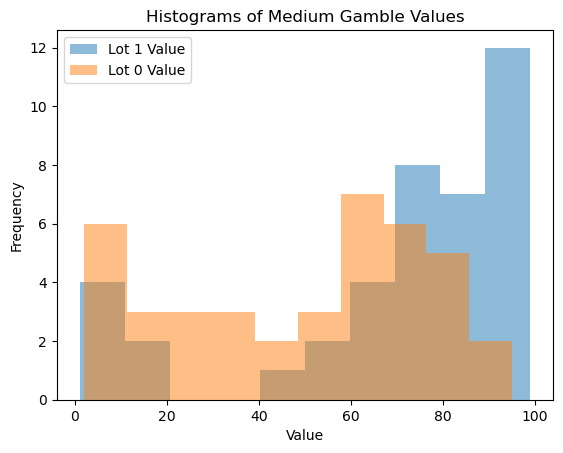

In [42]:
# Plot the histograms with translucency
plt.hist(medium_gambles['lot_1_val'], alpha=0.5, label='Lot 1 Value')
plt.hist(medium_gambles['lot_0_val'], alpha=0.5, label='Lot 0 Value')

# Add title and labels
plt.title('Histograms of Medium Gamble Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

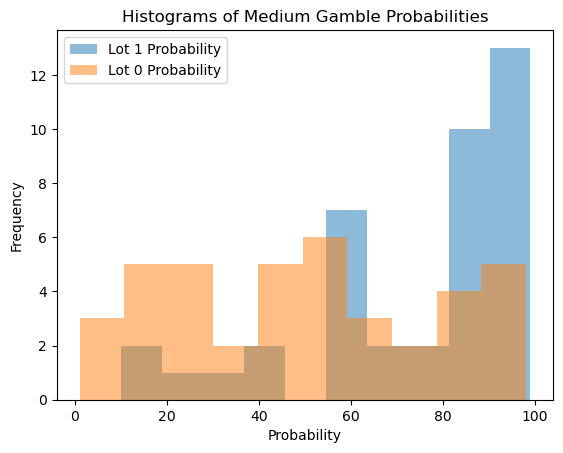

In [43]:
# Plot the histograms with translucency
plt.hist(medium_gambles['lot_1_prob'], alpha=0.5, label='Lot 1 Probability')
plt.hist(medium_gambles['lot_0_prob'], alpha=0.5, label='Lot 0 Probability')

# Add title and labels
plt.title('Histograms of Medium Gamble Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

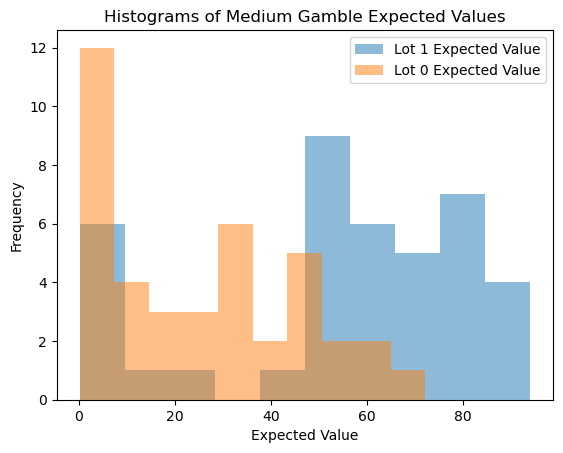

In [44]:
# Plot the histograms with translucency
plt.hist(medium_gambles['lot_1_ev'], alpha=0.5, label='Lot 1 Expected Value')
plt.hist(medium_gambles['lot_0_ev'], alpha=0.5, label='Lot 0 Expected Value')

# Add title and labels
plt.title('Histograms of Medium Gamble Expected Values')
plt.xlabel('Expected Value')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

##### Plot distributions for hard gambles

In [45]:
hard_gambles = gambles[gambles['DifficultyLevel'] == 2]

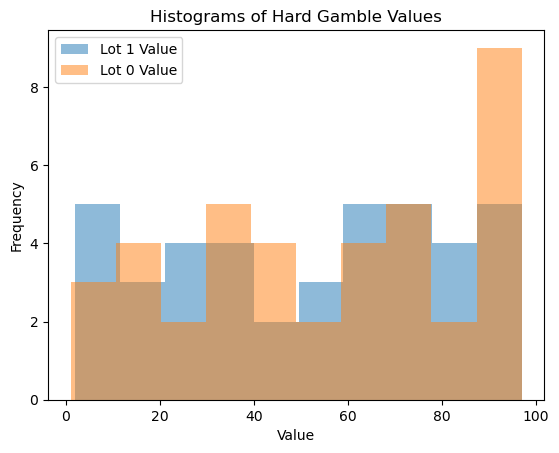

In [46]:
plt.hist(hard_gambles['lot_1_val'], alpha=0.5, label='Lot 1 Value')
plt.hist(hard_gambles['lot_0_val'], alpha=0.5, label='Lot 0 Value')

# Add title and labels
plt.title('Histograms of Hard Gamble Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

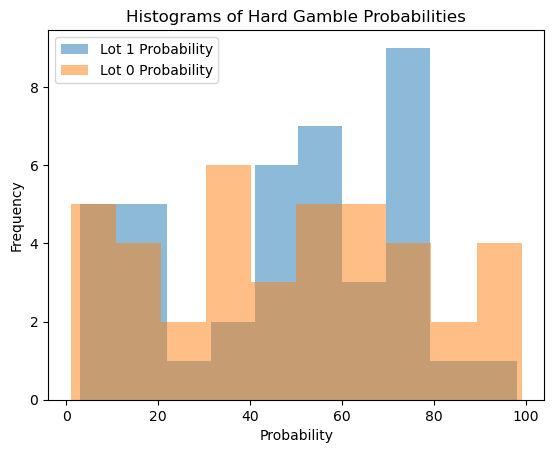

In [47]:
plt.hist(hard_gambles['lot_1_prob'], alpha=0.5, label='Lot 1 Probability')
plt.hist(hard_gambles['lot_0_prob'], alpha=0.5, label='Lot 0 Probability')

# Add title and labels
plt.title('Histograms of Hard Gamble Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

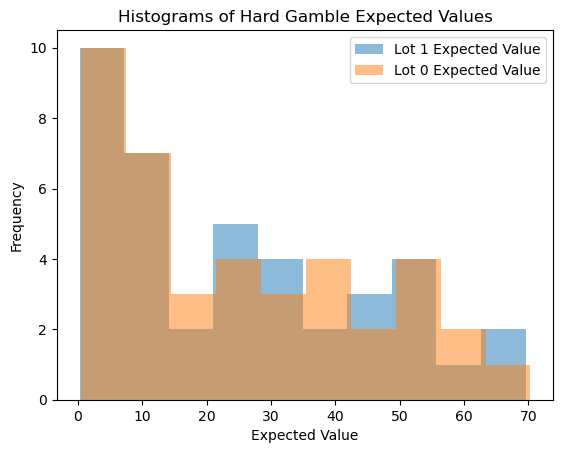

In [48]:
plt.hist(hard_gambles['lot_1_ev'], alpha=0.5, label='Lot 1 Expected Value')
plt.hist(hard_gambles['lot_0_ev'], alpha=0.5, label='Lot 0 Expected Value')

# Add title and labels
plt.title('Histograms of Hard Gamble Expected Values')
plt.xlabel('Expected Value')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

##### General distributions

In [59]:
diff_x = gambles['lot_0_val'] - gambles['lot_1_val']

diff_x = diff_x/100

diff_p = gambles['lot_0_prob'] - gambles['lot_1_prob']

diff_p = diff_p/100

diff_ev = gambles['lot_0_ev'] - gambles['lot_1_ev']

diff_ev = diff_ev/100

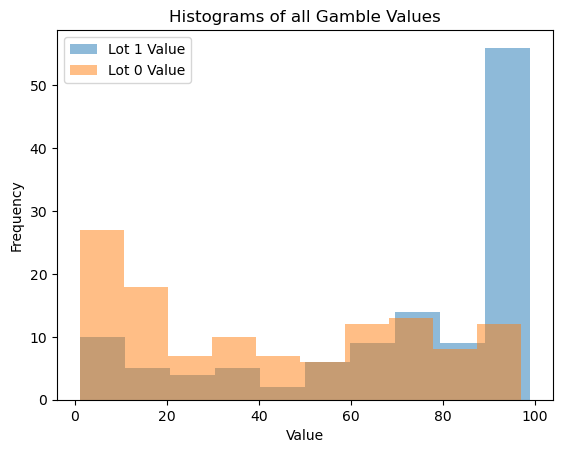

In [49]:
plt.hist(gambles['lot_1_val'], alpha=0.5, label='Lot 1 Value')
plt.hist(gambles['lot_0_val'], alpha=0.5, label='Lot 0 Value')

# Add title and labels
plt.title('Histograms of all Gamble Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

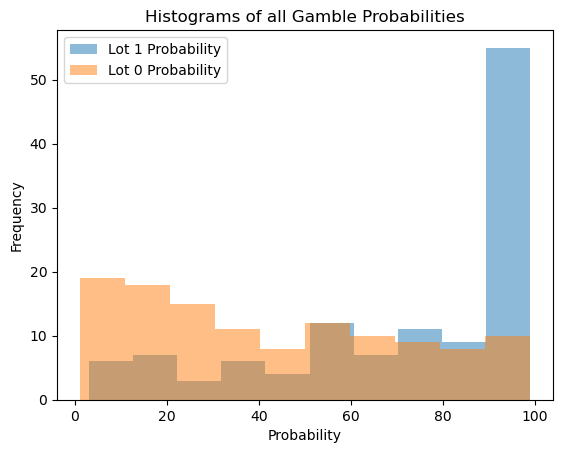

In [50]:
plt.hist(gambles['lot_1_prob'], alpha=0.5, label='Lot 1 Probability')
plt.hist(gambles['lot_0_prob'], alpha=0.5, label='Lot 0 Probability')

# Add title and labels
plt.title('Histograms of all Gamble Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

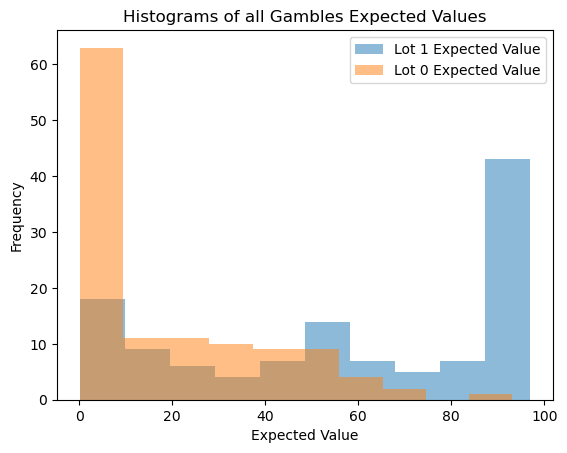

In [51]:
plt.hist(gambles['lot_1_ev'], alpha=0.5, label='Lot 1 Expected Value')
plt.hist(gambles['lot_0_ev'], alpha=0.5, label='Lot 0 Expected Value')

# Add title and labels
plt.title('Histograms of all Gambles Expected Values')
plt.xlabel('Expected Value')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

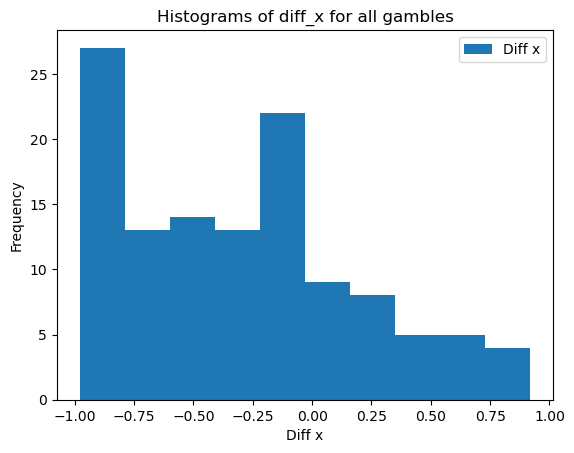

In [60]:
# Plot the histograms with translucency
plt.hist(diff_x, alpha=1, label='Diff x')

# Add title and labels
plt.title('Histograms of diff_x for all gambles')
plt.xlabel('Diff x')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

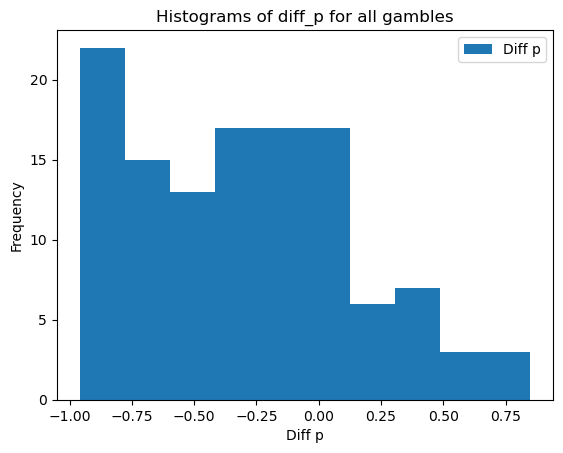

In [61]:
# Plot the histograms with translucency
plt.hist(diff_p, alpha=1, label='Diff p')

# Add title and labels
plt.title('Histograms of diff_p for all gambles')
plt.xlabel('Diff p')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

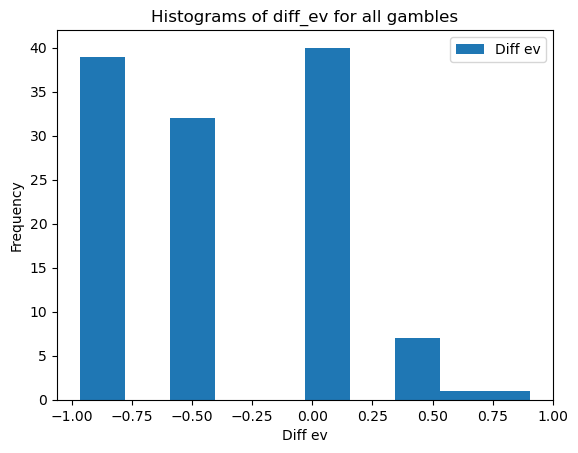

In [63]:
# Plot the histograms with translucency
plt.hist(diff_ev, alpha=1, label='Diff ev')

# Add title and labels
plt.title('Histograms of diff_ev for all gambles')
plt.xlabel('Diff ev')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()